# Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/DATASETS/voice.csv')

In [ ]:
df.head(3)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
df.shape

(3168, 21)

In [ ]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [ ]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [ ]:
# DATASET is balanced dataset

In [ ]:
df['label'] = df['label'].replace('male',1)
df['label'] = df['label'].replace('female',0)
df['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [ ]:
for i in df.columns :
  df[i] = df[i].astype(float)

In [ ]:
X = df.iloc[:,:-1]
y = df['label']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 20)

In [ ]:
X_train = tf.convert_to_tensor(X_train)
x_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [ ]:
y_train = tf.reshape(y_train , shape = (-1,1))
y_test = tf.reshape(y_test , shape = (-1,1))

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim = 20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                420       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the keras model
model.compile( loss= 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train , y_train , batch_size = 10, epochs = 150 , validation_split = 0.2 ,verbose = 0)

In [ ]:
model.evaluate(X_train,y_train)
#training score

70/70 [==============================] - 0s 4ms/step - loss: 0.1782 - accuracy: 0.9544


[0.17820371687412262, 0.9544429183006287]

In [ ]:
model.evaluate(X_test,y_test)
#testing score

30/30 [==============================] - 0s 3ms/step - loss: 0.1819 - accuracy: 0.9590


[0.18193267285823822, 0.9589905142784119]

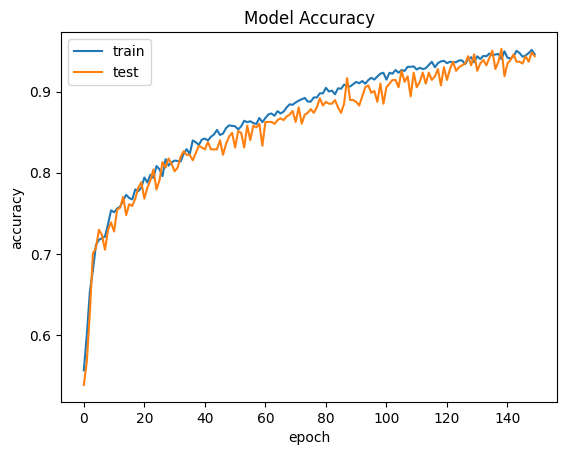

In [ ]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# model is not overfitted

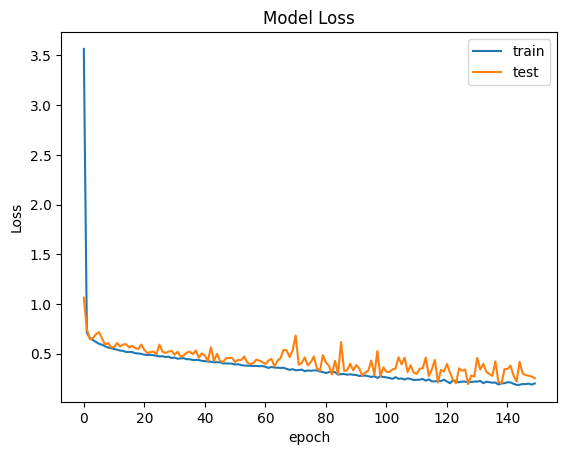

In [ ]:
# Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
y_pred = model.predict(X_test)

30/30 [==============================] - 0s 2ms/step


In [ ]:
print(y_pred[:5])
#here y_pred gives probability odds

[[9.3115538e-01]
 [7.8112945e-02]
 [9.5463818e-01]
 [5.5299397e-04]
 [5.9285308e-03]]


In [ ]:
# By applying threshold we convert it to 0 and 1
pred = []
for i in y_pred:
  if i>=0.5 :
    pred.append(1)
  else:
    pred.append(0)

In [ ]:
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,pred))

CONFUSION MATRIX
[[449  24]
 [ 15 463]]


In [ ]:
print("CLASSIFICATION REPORT")
print(classification_report(y_test,pred))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       473
         1.0       0.95      0.97      0.96       478

    accuracy                           0.96       951
   macro avg       0.96      0.96      0.96       951
weighted avg       0.96      0.96      0.96       951



In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy of the model is {scores[1]*100:.2f} %")

Accuracy of the model is 95.90 %
